# Automobile_insurance_fraud


# The article should contain the following sub-topics:
1. Problem Definition
2.  Data Analysis
3.  EDA Concluding Remarks
4.  Pre-processing Pipeline
5.  Building Machine Learning Models
6.  Concluding Remarks


The insurance industry is a complex and multifacted one with mant different types of polices & coverage option like car insurance health insurance life insurance there are wide varities of insurance product for the cutomers insurance faurad can happen it any stage of the process from the sale of the policy to the filing of the claim fraud can occur in the insurance of industry in a varity of ways including false claim, fake polices, identity theft insurers use a varity of tool and techniques including data analytics machine learning to prevent and detect the fraudulent activities it can also involve indiviuals or group and can be by polices holders insurers or third party given the complexcity and scale of the problem it is clear that we need a sophisticated tool and technique to help and detect and prevent insurence fraud insurance fraud is a serious problem that can cost insurers and policy holders bilions of doller each year it can take many forms such as false claim fake policy identity theft as explained eralier that's why it is so important to have effective tools and techniques for detecting and preventing insurence frauds

so question come how we detect or prevent from insurence frauds, so min this project our goal is to devlop a machine learnig model to detect insurence fraud by analysing the data on pst claims and policy holder we hope ton indentfy the pattern and trends that might be inductive ofthe fraudulent activity.


 so, problem statement of the project is with background that in mind our goal is to develop a machine learning model to detect insurence fraud we wanted to build a models that colud analyze data on the past claims and policy holders and predict likelihood of claim being fraudulent.this would allow to insurer to identify and investigate suspicious claims they are paid out potentially saving million of dollers in the process

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
data collection & preparation

here we collect the data and prepare the data we gether the large dataset of insurer claims along with information of policy holderand the claim themselves this include the
data on the type policy the policyholder age, location and details of the claim itself.
once we had the data then we clean it we had to pre process it and get it ready for thefurther analysis this involve the task 
such as removing the missing value or indirect values, transfarming the data into the format that colud be used
by our machine learning model

In [6]:
data=pd.read_csv('Automobile_insurance_fraud (1).csv')
data

data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


here i call the csv file.

In [7]:
data.replace('?',np.nan, inplace= True)

In [8]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


here we see in above data we replace '?' with nan.

In [9]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


here we got statical sumary of above data.

# i have to check the data type should have correct as well so i dont want like many in any kind of coloumn
who integer but have the data type of the object so here we need to check and along with ihave tocheck
the number null values in any kind of a column so here we see that have the null value aswell and those column are
mostly categorical coloumns and we can takeout the percentage of the missing values.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

here got info about null value.

In [11]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

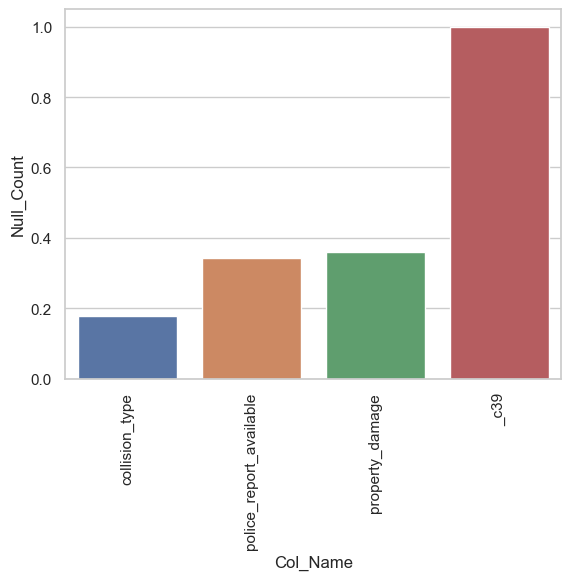

In [12]:
missing=data.isnull().sum()/len(data) # percentage
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing= missing.to_frame()
missing.columns=['Null_Count']
missing.index.names=['Col_Name']
missing=missing.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='Col_Name', y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show()

here i got the persentage of missing value in thosecolumns, here,I see that the most number of null value inthe property  are damage, this column not required any more.

In [13]:
data['collision_type']=data['collision_type'].fillna(data['collision_type'].mode()[0])
data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])
data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])


# correlation

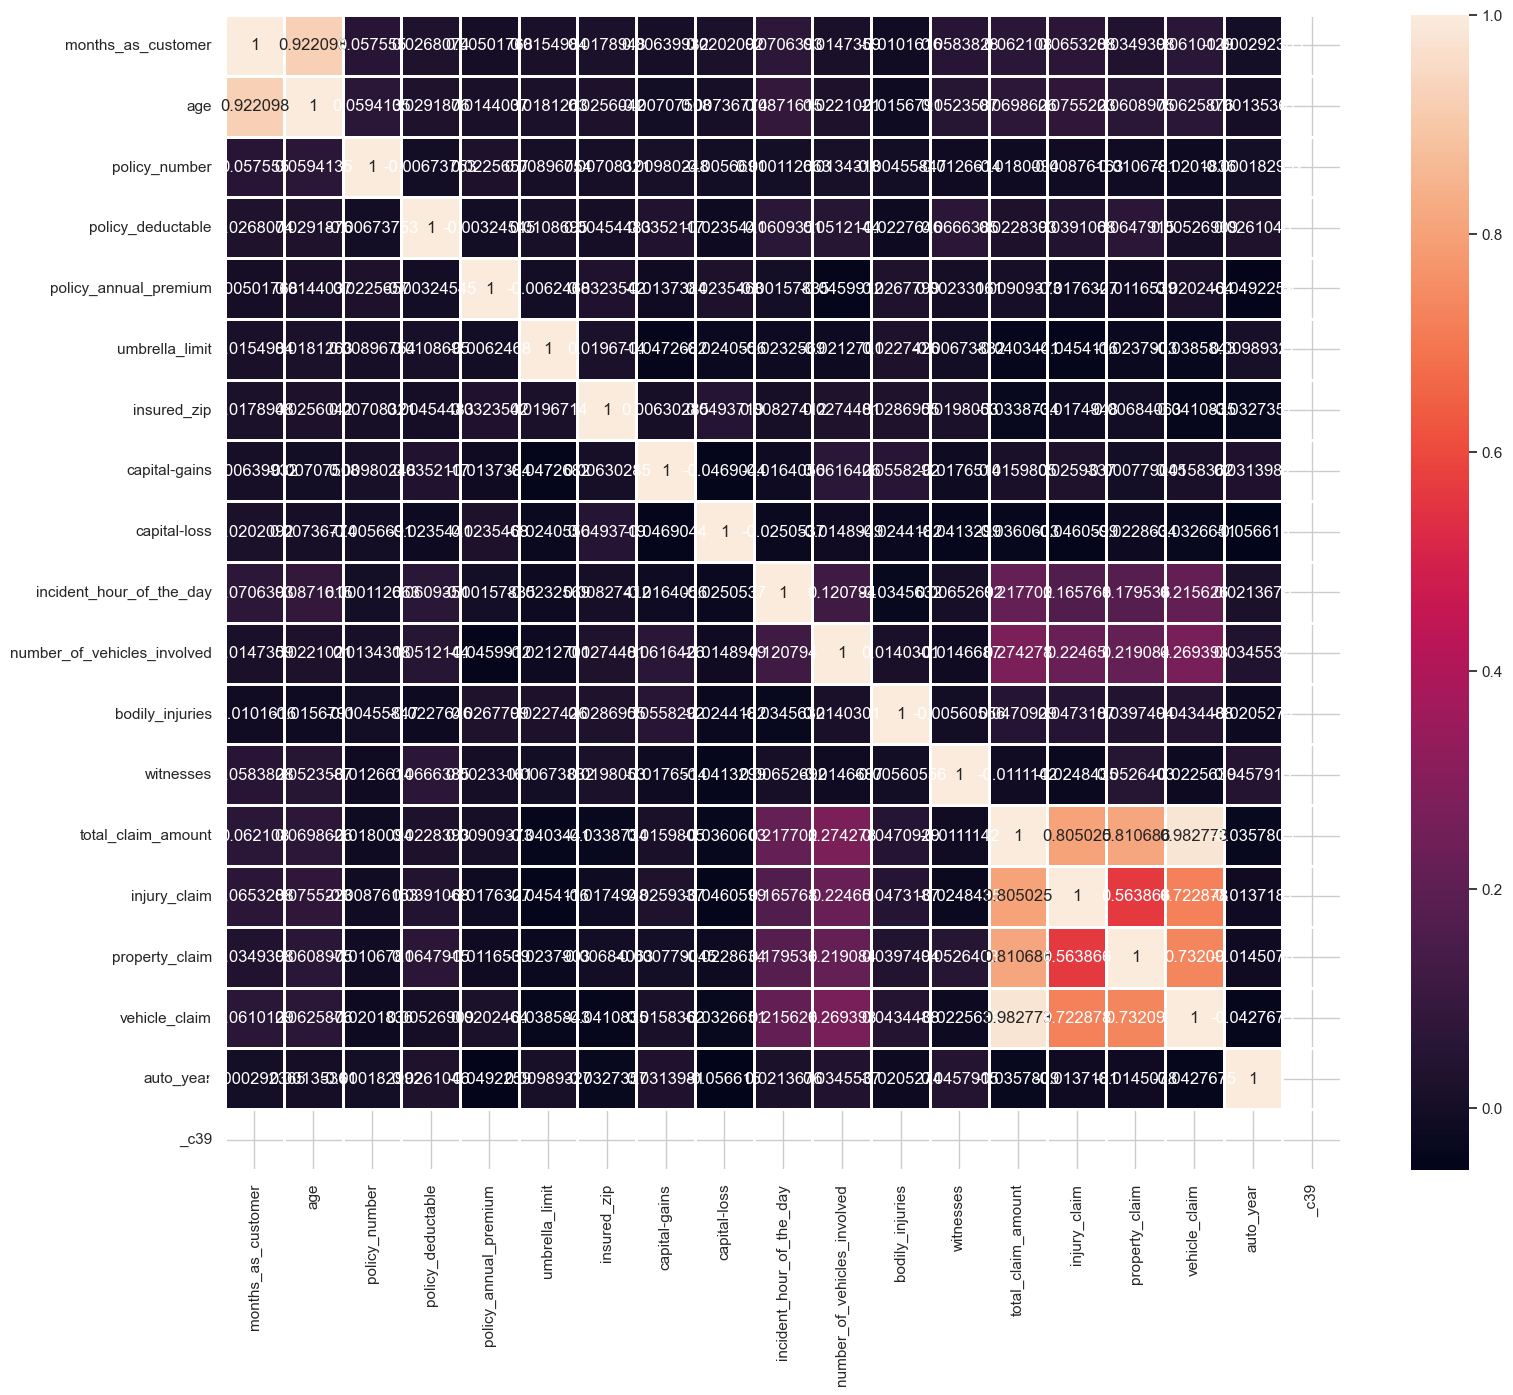

In [14]:
plt.figure(figsize=(18,15))
corr=data.corr()
sns.heatmap(data=corr,annot=True, fmt ='1g', linewidth=2)
plt.show()

here check the correlation to check the multicoloniality problems so here we can see that there
are like some coloumn who have the multicoloniality in there soso have to like drop some of these columns
as to reduse the problem of multiple energy 

# unique value

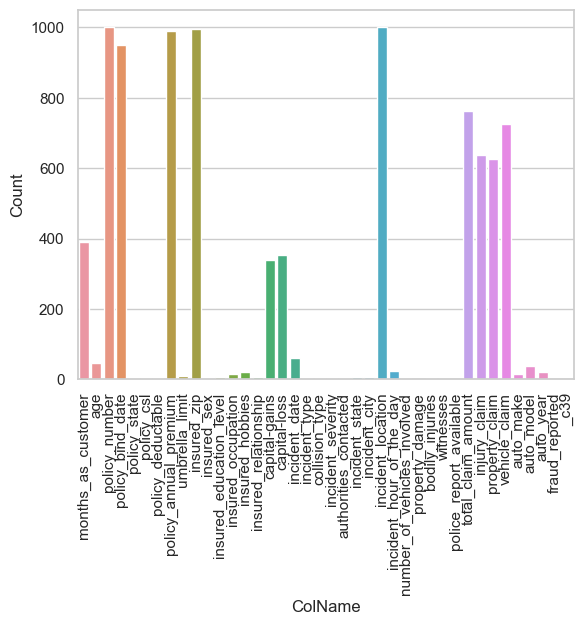

In [15]:
unique=data.nunique().to_frame()
unique.columns=['Count']
unique.index.names=['ColName']
unique=unique.reset_index()
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y='Count',data=unique)
plt.xticks(rotation=90)
plt.show()

here we check the unique value in each of categorical coloumns because if columns have more uniquevalue then the varience of that coloumn is so much high.so we have remove those kind of dataset for furfther analysis.

In [16]:
unique.sort_values(by='Count',ascending=False)

,ColName,Count
2,policy_number,1000
24,incident_location,1000
9,insured_zip,995
7,policy_annual_premium,991
3,policy_bind_date,951
31,total_claim_amount,763
34,vehicle_claim,726
32,injury_claim,638
33,property_claim,626
0,months_as_customer,391


In [17]:
#dropping columns which need anymore.
to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_date','incident_location','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']

data.drop(to_drop, inplace=True,axis=1)

After removeing column (policy_number','policy_bind_date','policy_state','insured_zip','incident_date','incident_location','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39'])
we got below mention coloumn

In [18]:
data.head()

ColName,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


here igot requried columns.

# now we check with the problem of multi-colonity

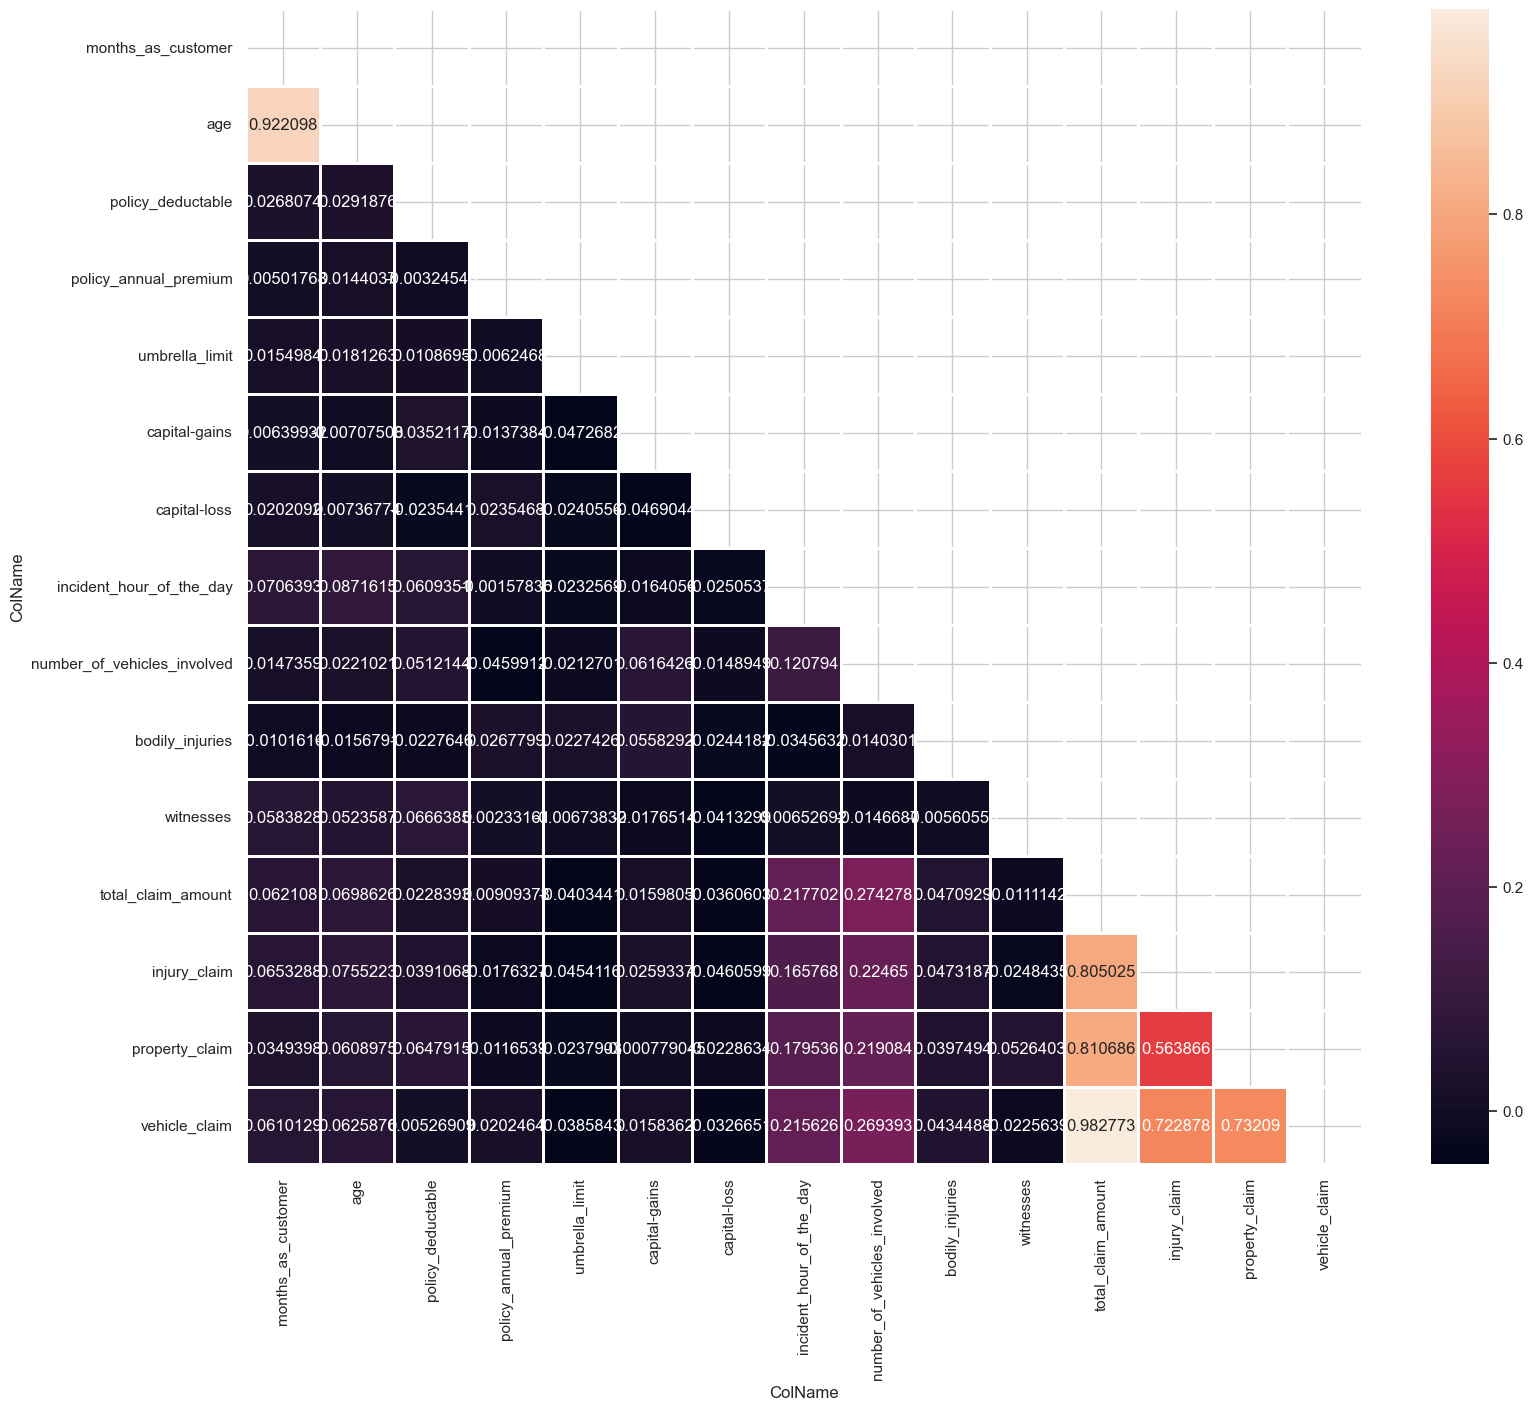

In [19]:
plt.figure(figsize=(18,15))
corr=data.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(data=corr,mask=mask,annot= True,fmt='2g',linewidth=1)
plt.show()

As we can see the age column and the month as the customer column have the very high correlation 
along with the correlation of the likea total game amount with a vehicle claim property claim and reclaim
these columns are also have the very high multicolonity so we have remove those coloumns.now can drop the column of age and total claim amt.

In [20]:
data.drop(columns=['age','total_claim_amount'], inplace = True, axis=1)

In [21]:
data.head()

ColName,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


As we see we dropped the age and totalcalim column.

In [22]:
#get target and indpendent feature seperated
x=data.drop('fraud_reported',axis=1)
y=data['fraud_reported']

Here get the target varible single varible and the independent varibles or other varibles and then
we standardizations and the one hot encoding as well so all them category papers that i used ican make
make them into the numerical by using the one hot encoding then i check my numerical columns as well
and then i check and concatenate both  them to make a complete independent varible data set

In [23]:
#converting the label columns into numerical by doing one encoding.
categorical_cols=x.select_dtypes(include=['object'])
categorical_cols=pd.get_dummies(categorical_cols, drop_first=True)
categorical_cols.head()


,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [24]:
numerical_col= x.select_dtypes(include=['int64'])
x=pd.concat([numerical_col,categorical_cols],axis=1)
x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0


# outier check
then we check outier aswell 

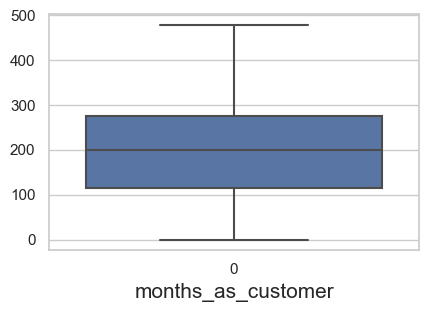

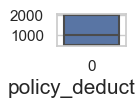

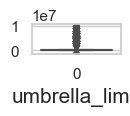

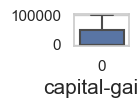

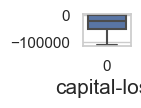

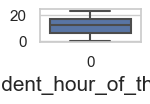

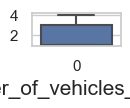

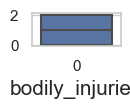

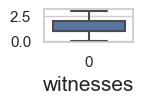

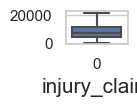

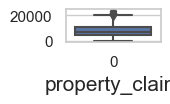

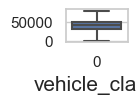

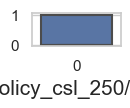

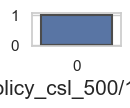

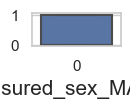

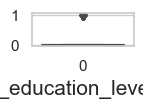

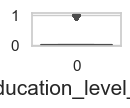

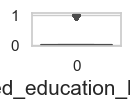

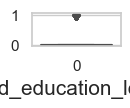

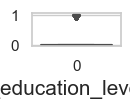

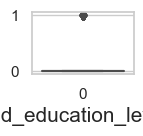

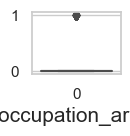

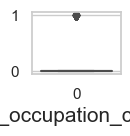

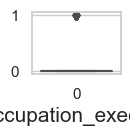

In [25]:

plt.figure(figsize=(20,15))
plotnumber=1

for col in x.columns:
    if plotnumber<=24:
        ax =plt.subplot(5,5, plotnumber)
        sns.boxplot(x[col])
        plt.xlabel(col, fontsize=15)
        
        plotnumber +=1
        plt.tight_layout()
        plt.show()

here we see there are like some kind of Outliers are in there so we need to standrised those columnsusing standard scaler.

# here i use train test and split
i split my data set into test and train samples and then we have to do
the scaling process for scaling process always remember you can do the scaling only on the trainning data as fit 
transform but on test you can only do the transform otherwise it will do the problem of data leakage.
that's why we can all the standredization aswell.

In [27]:

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test= train_test_split(x,y, test_size =0.25 )

In [28]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
988,295,500,0,0,0,5,1,1,1,12140,...,0,1,0,0,1,0,0,0,1,0
862,299,1000,0,0,-48800,3,1,2,0,6780,...,0,1,0,0,0,0,0,0,1,0
967,179,1000,6000000,53800,0,4,1,1,2,5420,...,0,0,0,0,0,0,0,1,1,0
947,465,500,6000000,0,0,7,1,0,3,4840,...,1,1,0,0,0,0,1,0,0,0
232,235,500,0,39900,-60200,7,4,2,1,6910,...,1,0,1,0,0,0,1,0,0,1


In [29]:
numerical_data=x_train[['months_as_customer','policy_deductable','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numerical_data)

In [31]:
scaled_num_df=pd.DataFrame(data=scaled_data, columns=numerical_data.columns, index=x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
988,0.806585,-1.044139,-0.493291,-0.902716,0.983943,-0.938549,-0.792544,0.032292,-0.435722,0.960506,-0.273378,0.232088
862,0.841959,-0.227555,-0.493291,-0.902716,-0.748059,-1.230387,-0.792544,1.243230,-1.340961,-0.129952,-0.125684,0.136860
967,-0.219260,-0.227555,2.109065,1.009727,0.983943,-1.084468,-0.792544,0.032292,0.469518,-0.406635,0.718882,-0.007298
947,2.309979,-1.044139,2.109065,-0.902716,0.983943,-0.646712,-0.792544,-1.178646,1.374757,-0.524632,-0.529244,-0.220903
232,0.275976,-1.044139,-0.493291,0.515620,-1.152666,-0.646712,2.154935,1.243230,-0.435722,-0.103504,-0.098641,0.904999


In [32]:
x_train.drop(columns=scaled_num_df.columns, inplace = True)

In [33]:
x_train= pd.concat([scaled_num_df, x_train], axis=1)

In [34]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
988,0.806585,-1.044139,-0.493291,-0.902716,0.983943,-0.938549,-0.792544,0.032292,-0.435722,0.960506,...,0,1,0,0,1,0,0,0,1,0
862,0.841959,-0.227555,-0.493291,-0.902716,-0.748059,-1.230387,-0.792544,1.243230,-1.340961,-0.129952,...,0,1,0,0,0,0,0,0,1,0
967,-0.219260,-0.227555,2.109065,1.009727,0.983943,-1.084468,-0.792544,0.032292,0.469518,-0.406635,...,0,0,0,0,0,0,0,1,1,0
947,2.309979,-1.044139,2.109065,-0.902716,0.983943,-0.646712,-0.792544,-1.178646,1.374757,-0.524632,...,1,1,0,0,0,0,1,0,0,0
232,0.275976,-1.044139,-0.493291,0.515620,-1.152666,-0.646712,2.154935,1.243230,-0.435722,-0.103504,...,1,0,1,0,0,0,1,0,0,1


# modeling support vector classifier

In [ ]:
Here we call the svc from the sqln library add my machine learning models and then after I can check the
score of my training and my testing aswell then we see our dataset is underfitting and over fitting
then you can check the socre of confusion metrix and also the classification report as well asyou see
it gave testing accuracy of 0.7 that mean it is a 0.77. 


In [35]:
from sklearn.svm import SVC
svc_model= SVC()
svc_model.fit(x_train, y_train)
y_pred=svc_model.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
svc_model_train_acc= accuracy_score(y_train, svc_model.predict(x_train))
svc_model_test_acc= accuracy_score(y_test,y_pred)

print('Training Accuracy:',svc_model_train_acc)
print('Testing Accuracy:',svc_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.8493333333333334
Testing Accuracy: 0.772
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250




# K - nearest neighborhood

In [ ]:
Now we use knn model by using same approch and it also give .77accuracy in the testing phase.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=30)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn_model_train_acc= accuracy_score(y_train, knn_model.predict(x_train))
knn_model_test_acc= accuracy_score(y_test,y_pred)

print('Training Accuracy:',knn_model_train_acc)
print('Testing Accuracy:',knn_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 0.7506666666666667
Testing Accuracy: 0.772
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



# Decision Tree classifier

In [ ]:
Now here we use Decision tree classifier as well it has also gave traing 1.0 and testing accuracy 0.72.

In [93]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train,y_train)
y_pred=decision_tree_model.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
decision_tree_model_train_acc= accuracy_score(y_train,decision_tree_model.predict(x_train))
decision_tree_model_test_acc= accuracy_score(y_test,y_pred)

print('Training Accuracy:',decision_tree_model_train_acc)
print('Testing Accuracy:',decision_tree_model_test_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy: 1.0
Testing Accuracy: 0.728
[[171  22]
 [ 46  11]]
              precision    recall  f1-score   support

           N       0.79      0.89      0.83       193
           Y       0.33      0.19      0.24        57

    accuracy                           0.73       250
   macro avg       0.56      0.54      0.54       250
weighted avg       0.68      0.73      0.70       250



# Random Forest Classification
here we use random forest classification as well.

In [135]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs = -1, 
                             class_weight = 'balanced', max_features = 'auto')
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf_model_train_acc= accuracy_score(y_train, rf_model.predict(x_train))
rf_model_test_acc= accuracy_score(y_test,y_pred)

print('Training Accuracy:',rf_model)
print('Testing Accuracy:',rf_model)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s


Training Accuracy: RandomForestClassifier(class_weight='balanced', max_features='auto',
                       n_estimators=1000, n_jobs=-1, verbose=1)
Testing Accuracy: RandomForestClassifier(class_weight='balanced', max_features='auto',
                       n_estimators=1000, n_jobs=-1, verbose=1)
[[193   0]
 [ 57   0]]
              precision    recall  f1-score   support

           N       0.77      1.00      0.87       193
           Y       0.00      0.00      0.00        57

    accuracy                           0.77       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.60      0.77      0.67       250



[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.3s finished


# model camparsion

In [149]:
models =pd.DataFrame({
    'Model':['svc_model','knn_model','Decision Tree','Random Forest'],
    'score':[svc_model_test_acc,knn_model_test_acc,decision_tree_model_test_acc,rf_model_test_acc]
})


models

,Model,score
0,svc_model,0.772
1,knn_model,0.772
2,Decision Tree,0.752
3,Random Forest,0.772


In [ ]:
now here i compare all models and got score.